In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Attribute Information:

-For more information, read [Cho et al, 2020].
- station - used weather station number: 1 to 25
-  Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
-  Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- Cheking for missing values
- looks like most of the column have missing values

# Exploratory Data Analysis

In [6]:
#Dropping the Missing values as it might mislead us if we go with mean or median

df=df.dropna()

In [7]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

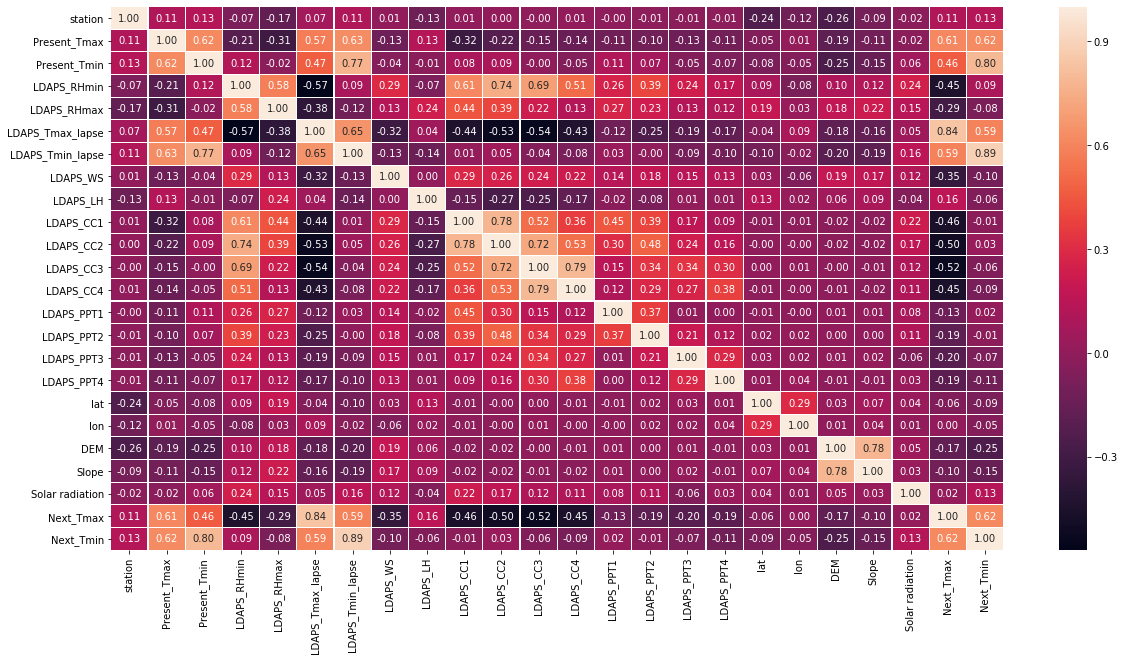

In [15]:
df_corr= df.corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(df_corr, annot=True,fmt='.2f',linecolor='white',linewidths=0.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- We can see here Present_Tmax and Present_Tmin are highly correlated with Target variables
- LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables
- Next_Tmin and Next_Tmax are also highly correlated with exch other
- most of the columns are negatively correlated with target variables

In [16]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

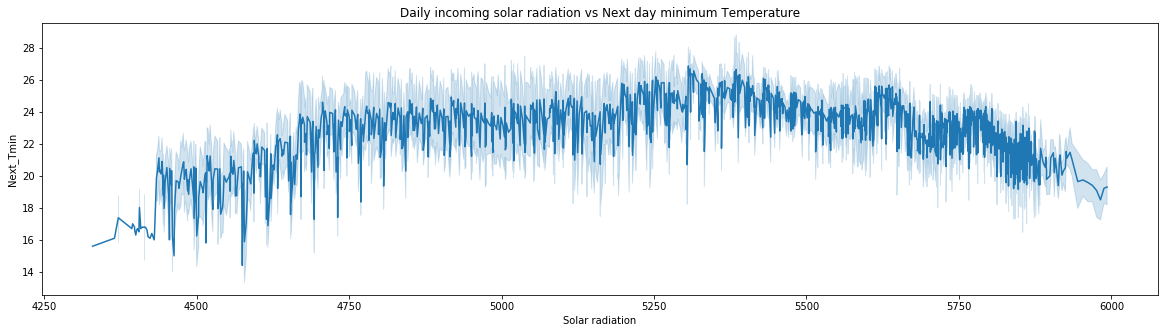

In [17]:

# Lineplot Display distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

 - According to solar radiation, the next day minimum temparature is frequently increases.

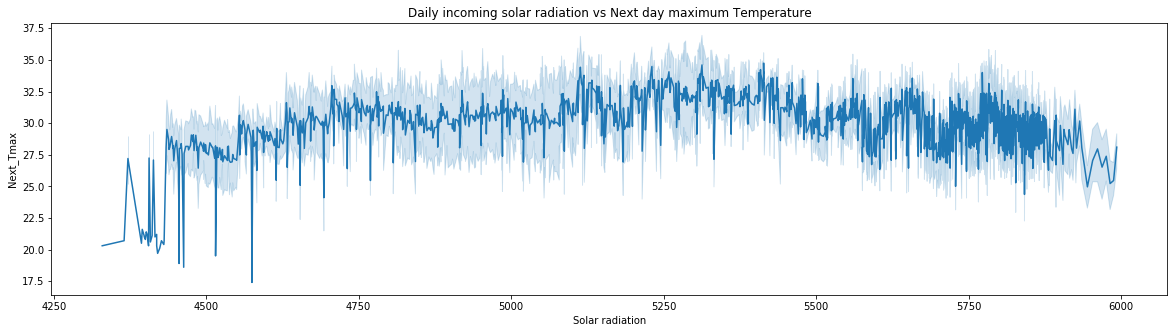

In [18]:

# Lineplot Display distribution of data across Daily incoming solar radiation vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

- According to solar radiation, the next day maximum temparature is frequently increases

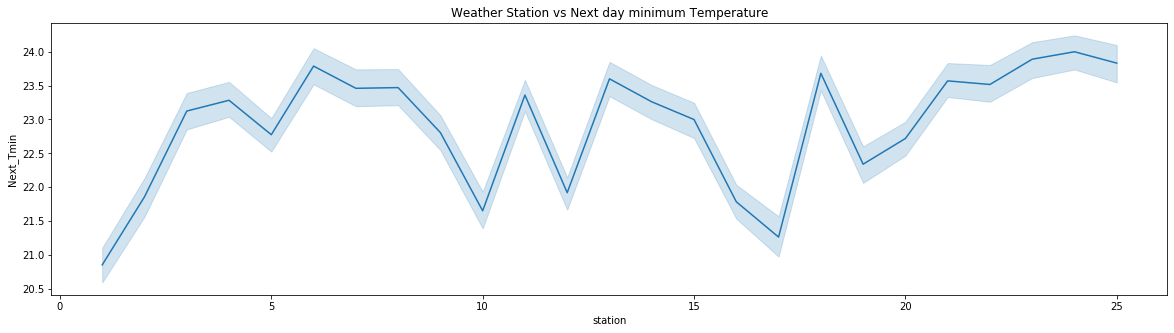

In [19]:
# Lineplot Display distribution of data across Weather Station vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

- The line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

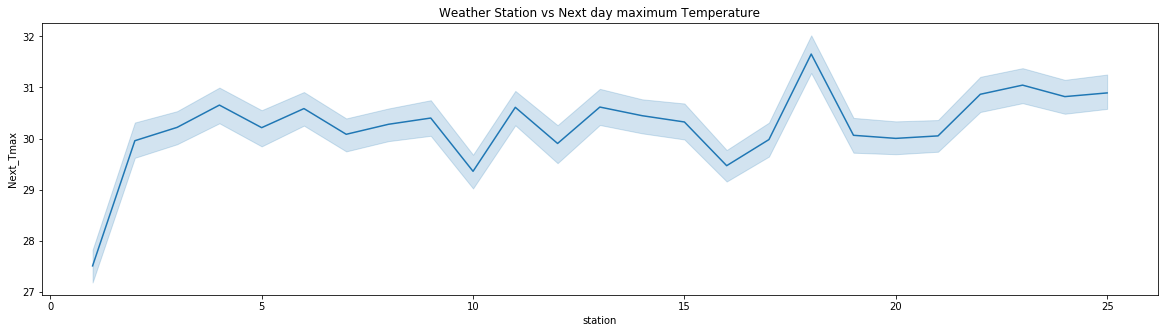

In [20]:

# Lineplot Display distribution of data across Weather Station vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

Text(0, 0.5, 'Next_Tmax')

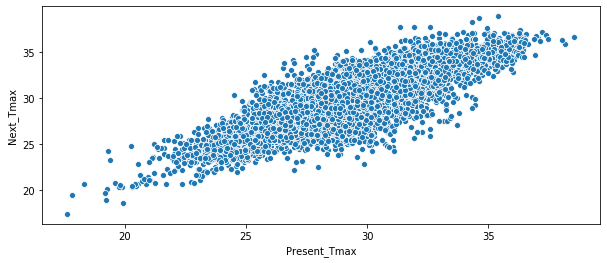

In [21]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

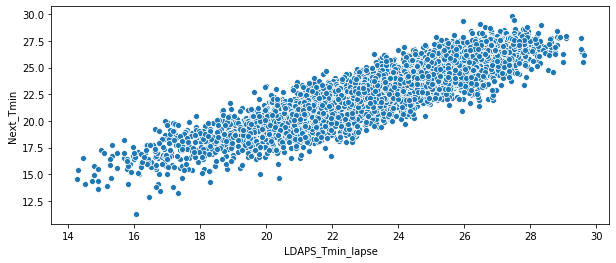

In [22]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmin')

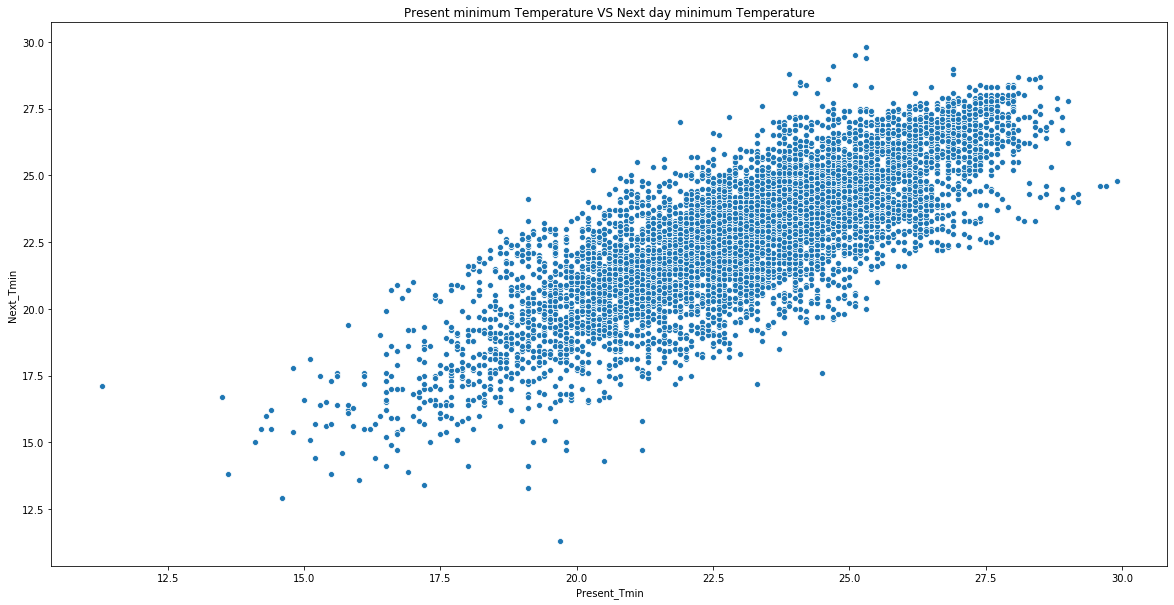

In [23]:

# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmax')

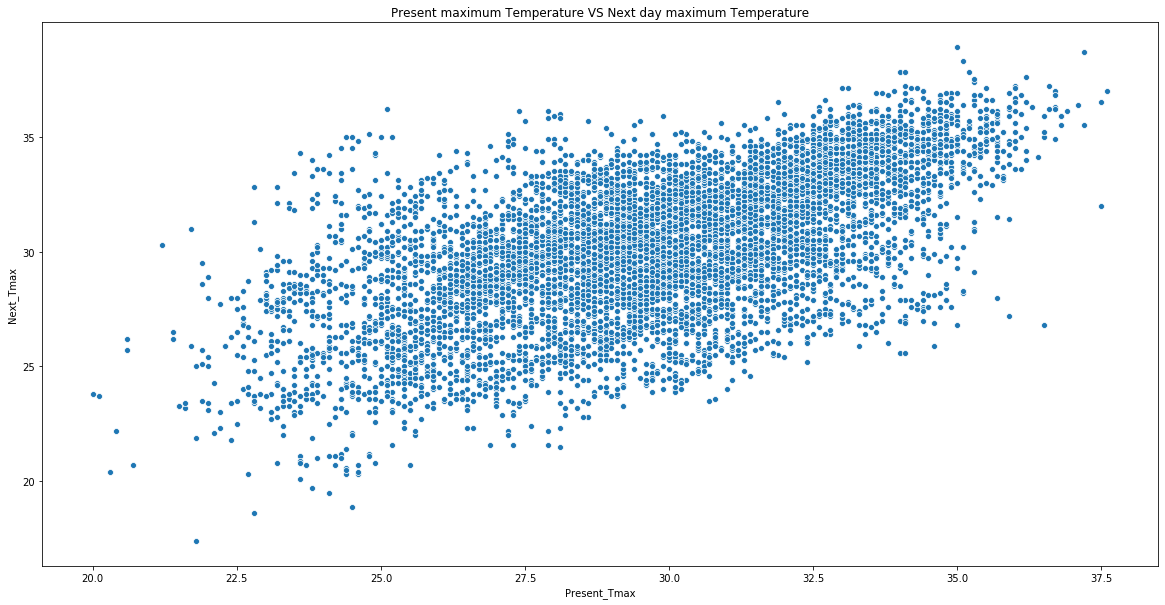

In [24]:

# Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

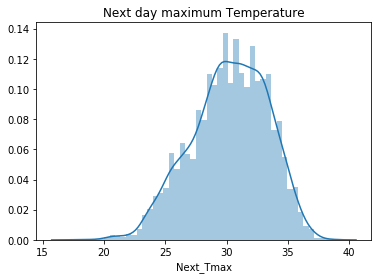

In [25]:
# Distplot Display distribution of data across Next day maximum Temperature.
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)


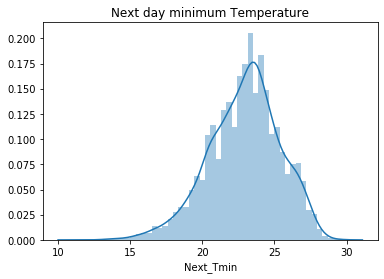

In [26]:
# Distplot Display distribution of data across Next day minimum Temperature.
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

In [27]:

import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)


In [28]:

df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [29]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [30]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [31]:
df.describe() #statistics summary for numerical columns

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,735795.210727,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,520.426996,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,734875.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,735806.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,736199.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# Skewness handling

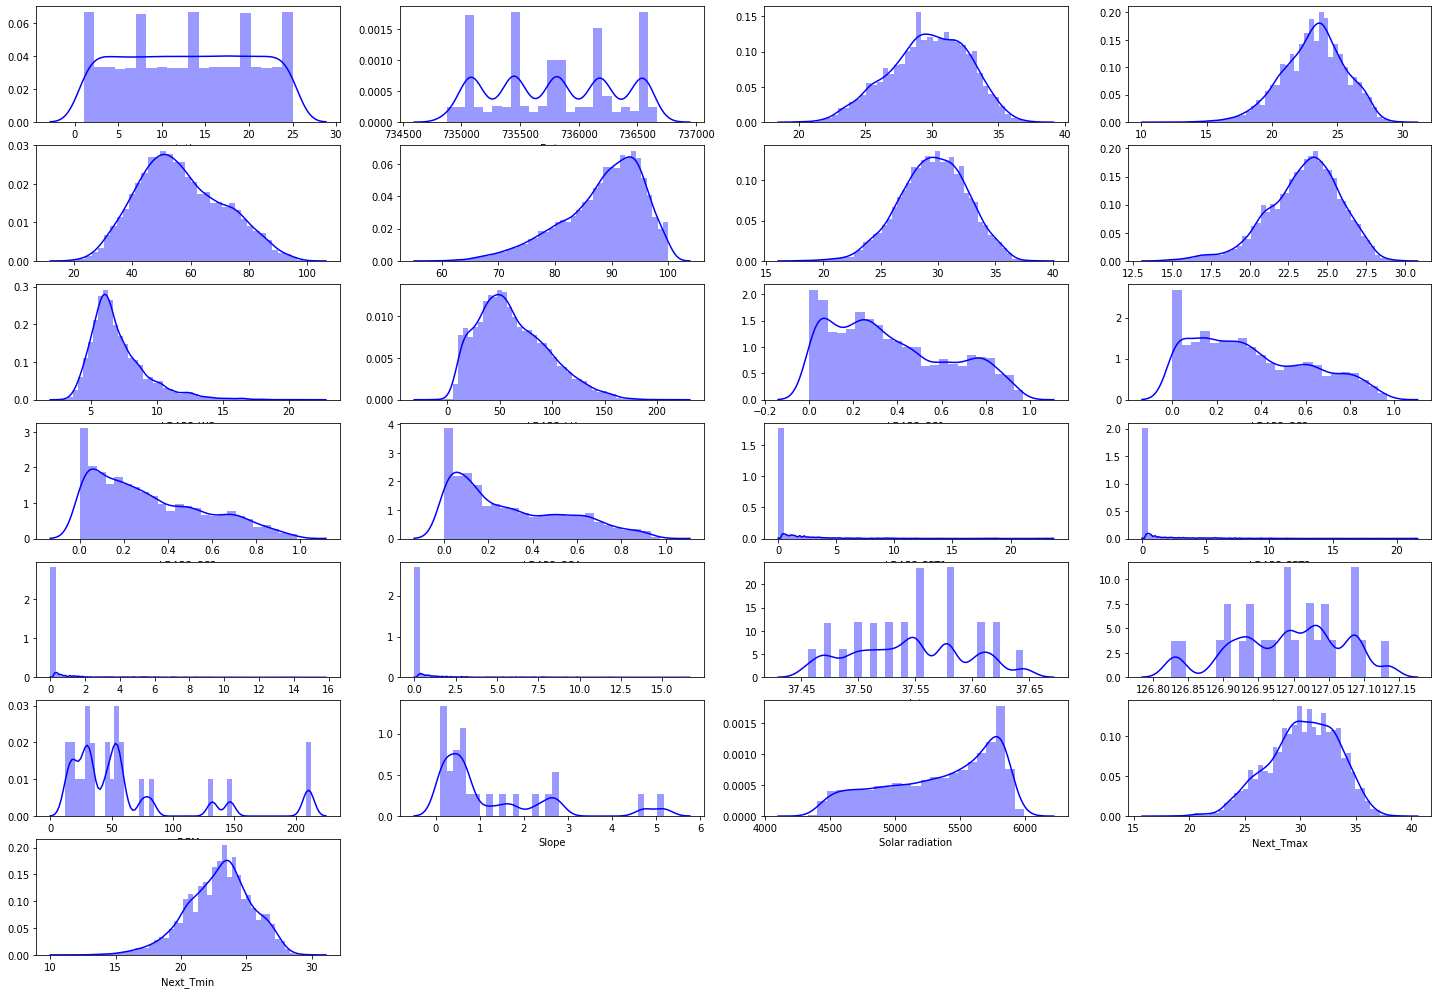

In [33]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [34]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

skewness more than+/- 0.5 will we treated

In [36]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [37]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

# Outliers Handling

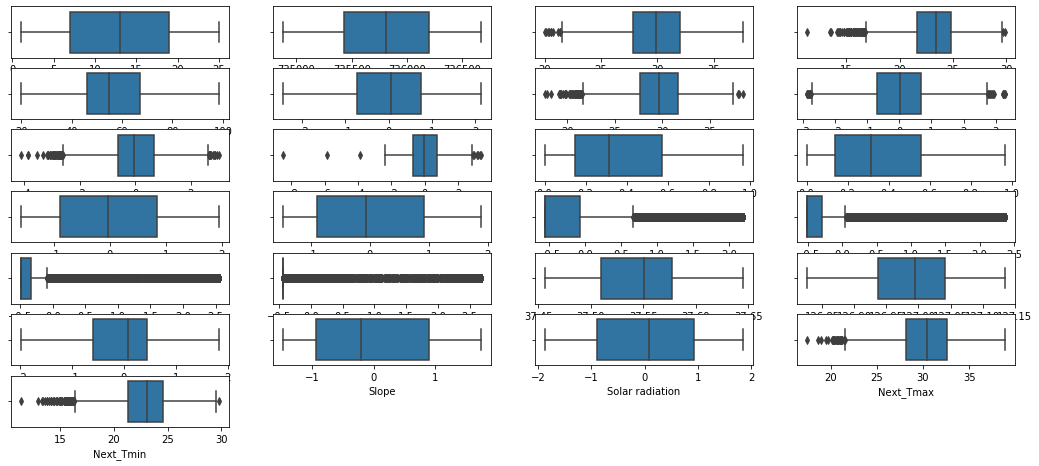

In [39]:

plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

- Only some of columns seems having outliers after skewness removed 

# outliers removal

In [41]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([1751, 2091, 2154, 2316, 2413, 2425, 2591, 2599, 2633, 2699, 2700,
       2708, 2733, 3123, 3141, 3147, 3148, 3148, 3166, 3172, 3173, 3223,
       3435, 3437, 3481, 3522, 4281, 4506, 4531, 4656, 4708, 4964, 4989,
       4989, 5014, 5379, 5675, 5949, 5959, 5967, 5972, 5973, 5982, 5983,
       5991, 5997, 5998, 6007, 6007, 6008, 6016, 6023, 6032, 6032, 6033,
       6035, 6041, 6048, 6048, 6050, 6051, 6057, 6057, 6057, 6057, 6058,
       6058, 6058, 6059, 6059, 6060, 6060, 6061, 6061, 6062, 6063, 6063,
       6065, 6065, 6066, 6066, 6066, 6067, 6068, 6068, 6068, 6069, 6069,
       6071, 6071, 6072, 6072, 6073, 6073, 6073, 6074, 6075, 6075, 6076,
       6076, 6077, 6117, 6140, 6957, 6970, 6971, 6979, 6980, 6981, 7450,
       7457, 7474, 7481, 7506, 7515, 7515, 7539, 7539, 7539, 7539, 7539,
       7540, 7547, 7549, 7553, 7554, 7556, 7557, 7557, 7563, 7563, 7563,
       7564, 7564, 7571, 7572, 7572, 7574, 7578, 7579, 7579, 7581, 7582],
      dtype=int64), array([ 9,  8,  8,  9,  8,  8

In [42]:

df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (7482, 25)


- Zscore removing all rows from data

# IQR

In [43]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

28.295692022675517

In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

choosing ZSCORE because there is huge dataloss in IQR

In [44]:

df=df_1

In [45]:
df.shape

(7482, 25)

# Dividing data into X and Y
seperating both varialbes into different part

In [46]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

# scaling X values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [ ]:
pd.DataFrame(x).isnull().sum()

In [ ]:
pd.DataFrame(x).describe()

# MODEL BUILDING
# Next_Tmax
# Linear Regression

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7865417850886562  on Random_state  225


In [49]:
# spliting data 70% for train and 30% for test
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [50]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [51]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")
    print("*******************************************************************************")

*******************************************************************************
accuracy score of : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score:                 0.7865417850886562
Mean Absolute Error:      1.0767490227068786
Mean Squared error:       2.0104546088137214
Root Mean Squared Error:  1.417905006978155
[0.59381378 0.69539358 0.62136392 0.64180942 0.72098866 0.73331502
 0.77371424 0.64118124]
cross validation score:   0.6776974835922573
Difference between R2 score and cross validatio score is :   0.1088443014963989
*******************************************************************************
*******************************************************************************
accuracy score of : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_im

# Hyper Parameter Tuning
# with Ridge for Next_Tmax

In [52]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 0, 'random_state': 15, 'solver': 'auto'}

In [53]:
clf_pred=clf.best_estimator_.predict(x_test)

In [54]:
r2_score(y1_test, clf_pred)

0.7865591591955255

In [56]:
# Saving the model

In [57]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([28.72591148, 29.5219846 , 26.44881857, ..., 30.22585056,
       31.85041506, 31.91556462])

In [58]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

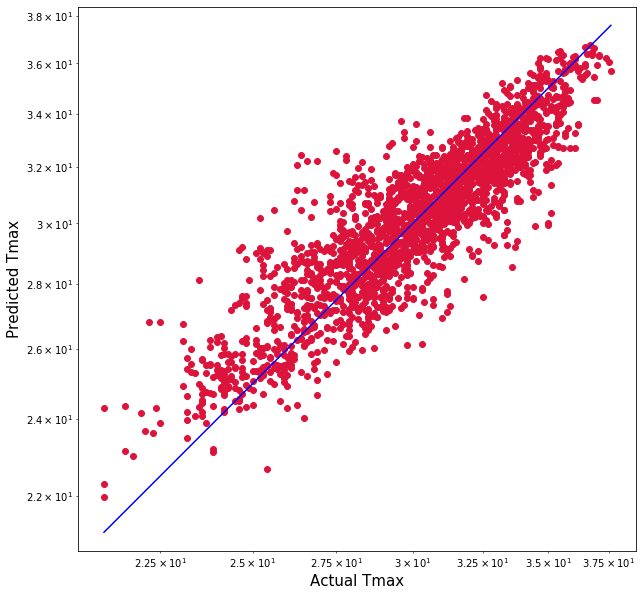

In [59]:

plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

In [60]:
# Next_Tmin

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

In [61]:

# spiliting data 75% train and 25% for test
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [62]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score:                 0.8365868532295622
Mean Absolute Error:      0.7678852099361706
Mean Squared error:       0.969354019783729
Root Mean Squared Error:  0.9845577787939767
[0.51198221 0.83772098 0.63977498 0.75502167 0.80512725 0.80896123
 0.85169085 0.8702346 ]
cross validation score:   0.7600642203105242
Difference between R2 score and cross validatio score is -  0.07652263291903794
*******************************************************************************
accuracy score of -> RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split

# Hyper Parameter Tuning
# with LinearRegression for Next_Tmin

In [63]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

clf = GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_  #Best parameters

{'fit_intercept': True, 'n_jobs': -1}

In [64]:
clf_pred=clf.best_estimator_.predict(x_test)

In [65]:
r2_score(y2_test, clf_pred)

0.8365868532295622

- Our model learnt almost 84.26% for Next_Tmin

In [66]:
# Saving the model

In [67]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([20.00837872, 25.29027533, 17.93297207, ..., 25.0051793 ,
       25.29523017, 19.26992852])

In [68]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

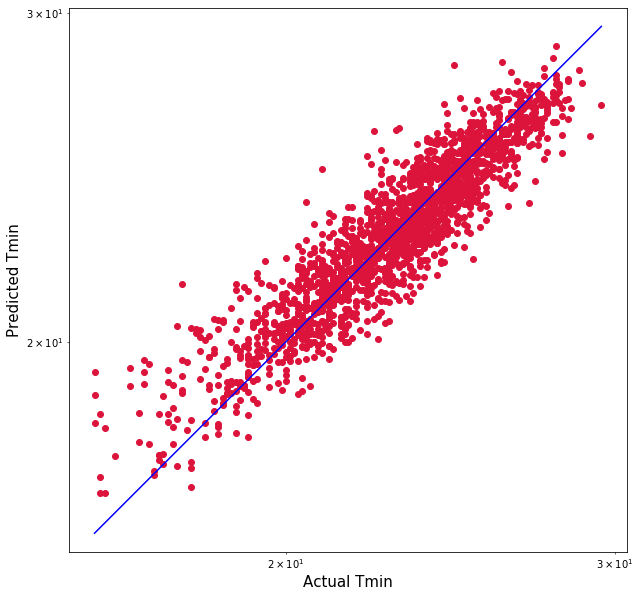

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()